## COMP 3400: Data Preparation Techniques Project
## Name of our Project

**Group Members:**
  - Liudmila Strelnikova 201819885
  - David Chicas 201919354

**Description of our data:**
This data set was uploaded by user *Daniel Grijalva* and was found in *Kaggle*, the dataset can be found [here](https://www.kaggle.com/datasets/danielgrijalvas/movies). This dataset compiles different aspect of the film industry from 1980 to 2020. In this data we can observe different patterns like the most commons release dates for films, the highest grossing genres of movies, as well as consumers best rated movies. We will use this information for **nlahnlahnlah**. 

**Description of our variables:**
- **Name:** Title of the film. This helps us differentiate between each film. 
- **Rating:** Given to each movie by the Classification and Ratings Administration (CARA), the rating provides information needed to determine of a film is suitable for children. We can use this information to see the difference between movies rated for everyone and for a specific group of consumers. 
- **Genre:** Is a thematic category given to a film depending on theme, plot, topics and other conventions. This information can help us determine what types of genres are the more popular, highest grossing, and more common. 
- **Year:** Release year of the film. Ranges from 1980 to 2020. We can use this to sed the difference between consuming movies in the past and present. 
- **Released:** Exact date when the film was released and place of release. This data can be presented in a more useful way by separating the information into two different columns. We can see what is the most commons and uncommon release date for a movie and see how it affects different aspects of the film. 
- **Score:** Rating given to a film by users of [iMDb.com](https://www.imdb.com) on a scale of 1 to 10 depending on enjoyability of the film. This can help us see any correlation between what consumers like and the different variables like genre, release date, and director.
- **Director:** Person who manages the film's creative aspects, like directing the film crew and actors. With the data we have we can see who the highest grossing directors are or the most well rated director. 
- **Writer:** Person who writed the script for the movie. This information is not relevant to our project.
- **Star:** Most known actor in that is in the movie. This information is not relevant to our project.
- **Country:** Place where the movie was released for it's premiere, decided by the producers and film company. We can see how the director or production company can affect the country of release for a film. 
- **Budget:** Amount of money alloted to the film's creation by the producers and film company, presented in US dollars. With this information we can see if a film was profitable or lost money, and we can also see if different directors/film company have any tendencies to having a bigger budget with certain variables. 
- **Gross:** Refers to gross box office earnings of a movie in U.S. dollars, this does not include any other forms of revenue. This can be used to see any impact that user score has, what genres are the most profitable, and many more correlations.
- **Company:** Business in charge of producing the film. We can see what type of film genre is most common with what film company, as well as the success that the companies films have. 
- **Runtime:** Total amount of time from start to finish that the film lasts. Presented in minutes. With this information we can see if the duration of the movie has any effect on budget, rating, or score. 

In [140]:
import numpy as np
import matplotlib as plt
import datetime
import pandas as pd

In [141]:
movies = pd.read_csv('./movies.csv')
movies.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


## Getting rid of unnecessary columns, splitting "released" column

The columns "writer", "votes", and "star" do not present any significance in the analysis, so they are removed from the dataframe.

In [142]:
to_drop = ['writer', 'votes', 'star']
movies.drop(to_drop, inplace=True, axis=1)
movies.head(5)

,name,rating,genre,year,released,score,director,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,Stanley Kubrick,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,Randal Kleiser,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,Irvin Kershner,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,Jim Abrahams,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,Harold Ramis,United States,6000000.0,39846344.0,Orion Pictures,98.0


The column "released" is split into "date" and "release_country" for more meaningful analysis. 

In [143]:
movies[['date','release_country']] = movies.released.str.split("(",expand=True)


By using the left parenthesis as a split symbol in the previous operation, the right parenthesis in the column release_country should be removed.

In [144]:
movies['release_country'] = movies['release_country'].str.replace(')', '', regex = True)

To finish this cleaning step off, the column "released" is deleted

In [145]:
movies.drop('released', inplace=True, axis=1)

Now that we deleted the data we do not need we can format some of our variables like: budget, gross and runtime. 
Edit: should probably do this last :)

In [146]:
#movies['budget'] = movies['budget'].apply(lambda x: f"${x*1:,.2f}")
#movies['gross'] = movies['gross'].apply(lambda x: f"${x*1:,.2f}")
#movies['runtime'] = movies['runtime'].apply(lambda x: f"{x*1:,.0f} min")

In [147]:
movies.head(10)

,name,rating,genre,year,score,director,country,budget,gross,company,runtime,date,release_country
0,The Shining,R,Drama,1980,8.4,Stanley Kubrick,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.8,Randal Kleiser,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,Irvin Kershner,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.7,Jim Abrahams,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.3,Harold Ramis,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States
5,Friday the 13th,R,Horror,1980,6.4,Sean S. Cunningham,United States,550000.0,39754601.0,Paramount Pictures,95.0,"May 9, 1980",United States
6,The Blues Brothers,R,Action,1980,7.9,John Landis,United States,27000000.0,115229890.0,Universal Pictures,133.0,"June 20, 1980",United States
7,Raging Bull,R,Biography,1980,8.2,Martin Scorsese,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,"December 19, 1980",United States
8,Superman II,PG,Action,1980,6.8,Richard Lester,United States,54000000.0,108185706.0,Dovemead Films,127.0,"June 19, 1981",United States
9,The Long Riders,R,Biography,1980,7.0,Walter Hill,United States,10000000.0,15795189.0,United Artists,100.0,"May 16, 1980",United States


## Mila trying to get a feel for the data distributions (consider semi-serious)

In [148]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7668 non-null   object 
 1   rating           7591 non-null   object 
 2   genre            7668 non-null   object 
 3   year             7668 non-null   int64  
 4   score            7665 non-null   float64
 5   director         7668 non-null   object 
 6   country          7665 non-null   object 
 7   budget           5497 non-null   float64
 8   gross            7479 non-null   float64
 9   company          7651 non-null   object 
 10  runtime          7664 non-null   float64
 11  date             7666 non-null   object 
 12  release_country  7666 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 778.9+ KB


Data in columns such as 'budget', 'gross' should be converted to float64; 'runtime' should be converted to int64, an 'name','rating', 'genre', 'country', 'company', 'release_country' should be strings. 
'year' can be converted to string because we are not likely to use it in any kind of statistical analysis. 

In [149]:
movies['score'] = movies['score'].astype(np.float64)
movies['budget'] = movies['budget'].astype(np.float64)
#movies['year'] = movies['year'].astype('|S4')

In [150]:
movies.describe()

,year,score,budget,gross,runtime
count,7668.000000,7665.000000,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,3.560000e+08,2.847246e+09,366.000000


In [151]:

movies.agg({'budget': ['mean', 'std', 'median'], 'gross': ['mean', 'std']})


,budget,gross
mean,3.558988e+07,7.850054e+07
std,4.145730e+07,1.657251e+08
median,2.050000e+07,NaN


In [152]:
agg_dict = {'budget': ['mean'], 'gross': ['mean']}
shmoney = movies.groupby(['year']).agg(agg_dict)
shmoney

,budget,gross
,mean,mean
year,,
1980,1.210319e+07,3.066256e+07
1981,1.043309e+07,2.423139e+07
1982,1.130635e+07,2.678639e+07
1983,1.004467e+07,2.148441e+07
1984,1.226732e+07,2.236134e+07
1985,1.245418e+07,2.085598e+07
1986,1.252265e+07,1.961028e+07
1987,1.280132e+07,2.145444e+07


[]

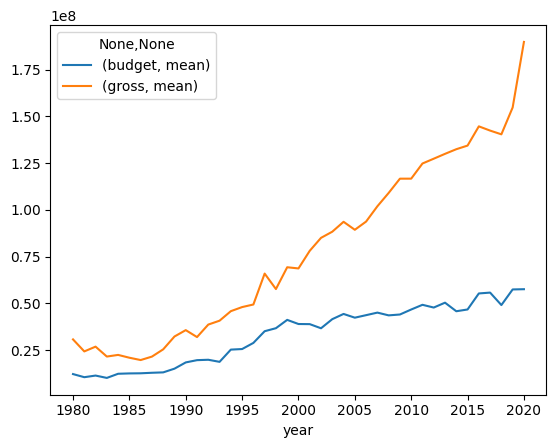

In [154]:
shmoney.plot()
axs.plot()

Well, the result of this evenings practice is that we have a noice graph about shmoney which tells us that movies' gross earnings have been steadily increasing over the years. Movies have also been becoming more expensive to make, however the increase in this parameter is not as drastic. 

### Mila tries scatter plots

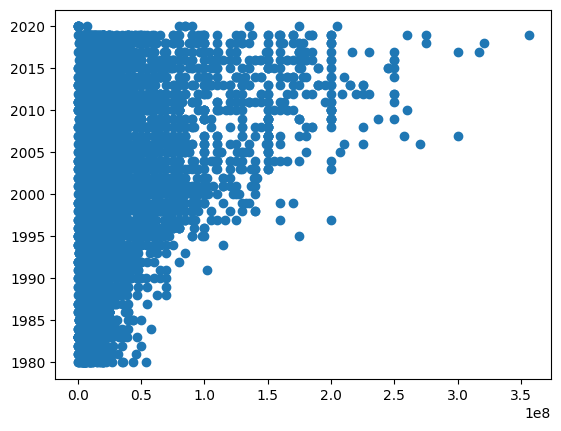

In [166]:
plt.scatter(movies[['budget']], movies[['year']])

Typycally, as Budget of the movies goes up, so does the Gross company earnings. 

Text(0, 0.5, 'Gross')

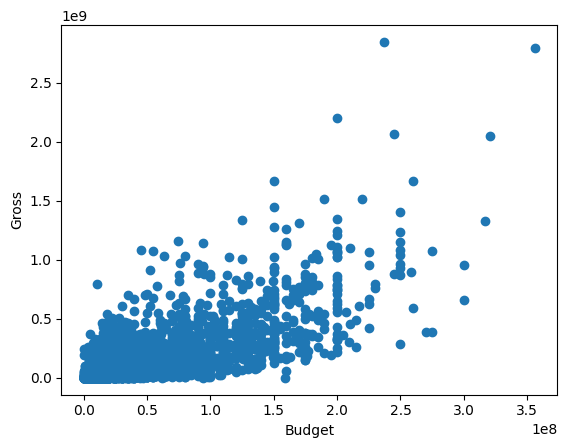

In [170]:
plt.scatter(movies[['budget']], movies[['gross']])
plt.xlabel("Budget")
plt.ylabel("Gross")